In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.cluster import hierarchy

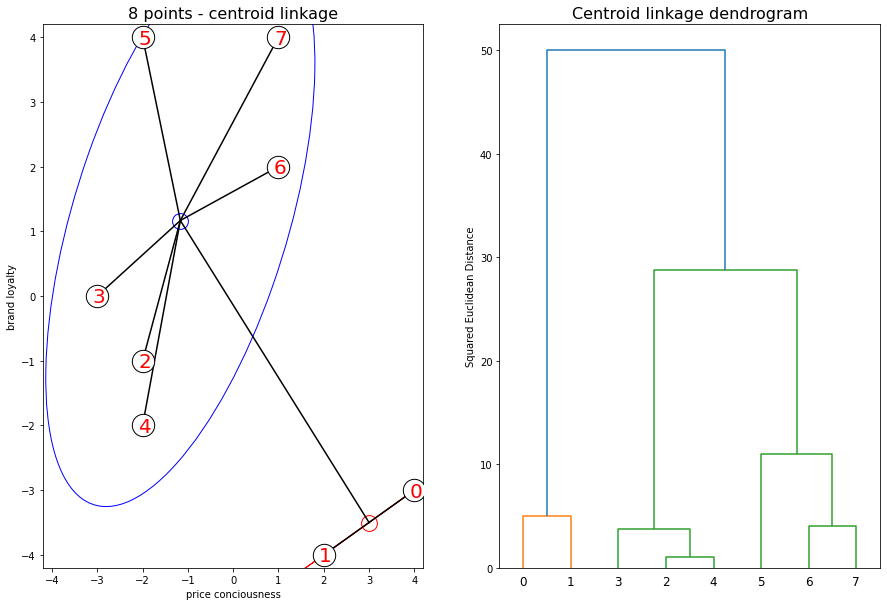

In [2]:
eight = np.array(([-3, -2, -2, -2, 1, 1, 2, 4], [0, 4, -1, -2, 4, 2, -4, -3])).T
eight = eight[[7,6,2,0,3,1,5,4], :]

d = np.zeros([8,8])

for i in range(0, 8):
    for j in range(0, 8):
        d[i, j] = np.linalg.norm(eight[i, :] - eight[j, :])

dd = (d**2)

ddd  = dd[1:, :-1][:, 0]
for i in range(1, 7):
    ddd = np.concatenate((ddd, dd[1:, :-1][i:, i]))

w = hierarchy.linkage(ddd, 'centroid')

groups = hierarchy.cut_tree(w, n_clusters = 2)

merg = pd.DataFrame(data = {"0": eight[:,0], "1": eight[:,1]})
merg["2"] = groups
merg1 = merg[merg["2"] == 0].iloc[:, :2]
merg2 = merg[merg["2"] == 1].iloc[:, :2]
m1 = np.mean(merg1)
m2 = np.mean(merg2)

covm = np.cov(merg1.iloc[:, 0], merg1.iloc[:, 1])
covm1 = np.cov(merg2.iloc[:, 0], merg2.iloc[:, 1])

eigva = np.sqrt(np.linalg.eig(covm)[0])
eigve = np.linalg.eig(covm)[1]
eigva1 = np.sqrt(np.linalg.eig(covm1)[0])
eigve1 = np.linalg.eig(covm1)[1]


fig = plt.figure(figsize = (15, 10))

ax = fig.add_subplot(1, 2, 1)
plt.xlim(-4.2, 4.2)
plt.ylim(-4.2, 4.2)
plt.title("8 points - centroid linkage", fontsize = 16)
plt.ylabel("brand loyalty")
plt.xlabel("price conciousness")

ax.scatter(np.mean(merg1.iloc[:, 0]), np.mean(merg1.iloc[:, 1]), facecolor = "w", edgecolor = "r", zorder = 0, s = 250)
ax.add_patch(Ellipse(xy = (np.mean(merg1.iloc[:, 0]), np.mean(merg1.iloc[:, 1])),
                     width = eigva[0]*3*1.15, height = eigva[1]*3*1.15,
                     angle = np.rad2deg(np.arccos(eigve[0, 0])), facecolor = "w", edgecolor = "r", zorder = 0))

ax.add_patch(Ellipse(xy = (np.mean(merg2.iloc[:, 0]), np.mean(merg2.iloc[:, 1])),
                     width = eigva1[0]*3*1.15, height = eigva1[1]*3*1.15,
                     angle = np.rad2deg(np.arccos(eigve1[0, 0])), facecolor = "w", edgecolor = "b", zorder = 0))
ax.scatter(np.mean(merg2.iloc[:, 0]), np.mean(merg2.iloc[:, 1]), facecolor = "w", edgecolor = "b", s = 250, zorder = 5)

for i in range(2, 8):
    plt.plot([m2[0], eight[i, 0]], [m2[1], eight[i, 1]], c = "black", zorder = 10)

plt.plot([m1[0], eight[0, 0]], [m1[1], eight[0, 1]], c = "black", zorder = 10)
plt.plot([m1[0], eight[1, 0]], [m1[1], eight[1, 1]], c = "black", zorder = 10)

plt.plot([m1[0], m2[0]], [m1[1], m2[1]], c = "black", zorder = 10)

plt.scatter(eight[:, 0], eight[:, 1], c = "w", edgecolors = "black", s = 500, zorder = 15)
for i in range(0, 8):
    plt.text(eight[i, 0]-0.1, eight[i, 1]-0.1, str(i), fontsize = 20, color = "r", zorder = 20)

fig.add_subplot(1, 2, 2)
h = hierarchy.dendrogram(w)
plt.title("Centroid linkage dendrogram", fontsize = 16)
plt.ylabel("Squared Euclidean Distance")

plt.show()